# Geometric Algebra and Its Applications in Deep Learning

## Outline

1. [Introduction to Geometric Algebra](#Introduction)

2. [Geometric Algebra in Deep Learning](#key-papers-leveraging-clifford-algebra-in-deep-learning)
   

3. **Example Architectures**
   - Clifford-Steerable Convolutional Neural Networks (CS-CNNs)
   - Clifford Group Equivariant Neural Networks (CGENNs)

4. **Experiments and Training**
   - Implementation Details and Code Examples
   - Training on Real-World Data with GA-Based Architectures
   - Performance Evaluation and Comparative Analysis

5. **Conclusion and Future Directions**
   - Summary of Key Insights
   - Potential Extensions and Open Research Questions





## Introduction

Geometric Algebra is a rich, unifying language that extends traditional algebraic systems. It blends the simplicity of vector algebra with the depth of complex numbers and quaternions, offering a coordinate-free approach to geometry. GA not only simplifies calculations and clarifies geometric intuition, but it also reveals underlying symmetries in physical laws and provides a robust framework for applications in fields ranging from physics and engineering to computer graphics and deep learning. To see how this works in practice, we can start by looking at some basic geometric primitives and then explore the different products that GA uses to combine and interpret them.

We begin with the idea of vectors, which have both magnitude (length) and direction in space. In a 2D plane, it is common to work with the unit vectors
$$
\hat{x} = \begin{pmatrix}1 \\ 0\end{pmatrix}, \quad 
\hat{y} = \begin{pmatrix}0 \\ 1\end{pmatrix},
$$
so that any 2D vector $\vec{v}$ can be written as
$$
\vec{v} = v_x \hat{x} + v_y \hat{y}.
$$
Moving to 3D adds $\hat{z}$:
$$
\hat{x} = \begin{pmatrix}1 \\ 0 \\ 0\end{pmatrix}, \quad 
\hat{y} = \begin{pmatrix}0 \\ 1 \\ 0\end{pmatrix}, \quad
\hat{z} = \begin{pmatrix}0 \\ 0 \\ 1\end{pmatrix}.
$$
These simple elements are central to GA because they form the “building blocks” of more complex geometric objects. Meanwhile, scalars such as $a \in \mathbb{R}$ are just numbers, while vectors like $\vec{v} = (v_1, v_2, v_3)$ capture direction. When two vectors in 2D define a parallelogram, their oriented area is expressed by $\vec{a} \wedge \vec{b}$, sometimes called a directed area. GA pays attention not only to magnitudes (like lengths or areas) but also to orientation (how those elements are “pointing”).

To make sense of these areas, GA introduces bivectors, which represent the size and handedness of a plane. In 2D, the wedge product $\vec{a} \wedge \vec{b}$ becomes a scalar multiple of the unit bivector $\hat{x}\hat{y}$, whose magnitude is given by $|a_1 b_2 - a_2 b_1|$ and whose sign encodes orientation. In 3D, if we add a third vector $\vec{c}$, then
$$
\vec{a} \wedge \vec{b} \wedge \vec{c}
$$
defines a trivector, corresponding to the oriented volume of the parallelepiped described by $\vec{a}$, $\vec{b}$, and $\vec{c}$. Swapping any two vectors changes the sign of this volume, reflecting a reversal in orientation.

<img src="https://www.researchgate.net/profile/A-Arsenovic/publication/318475103/figure/fig3/AS:547679924166656@1507588477660/nterpretation-of-some-elements-within-Geometric-Algebra-highlighting-their-creation.png" alt="drawing" width="600"/>

To combine these geometric primitives, we make use of products. One well-known example is the dot product,
$$
\vec{a} \cdot \vec{b} = a_1 b_1 + a_2 b_2 + a_3 b_3,
$$
which gives a scalar measuring the alignment of two 3D vectors. Another is the wedge (exterior) product, denoted $\wedge$, which indicates the oriented area spanned by two vectors. For instance, in 2D,
$$
\vec{a} \wedge \vec{b} = (a_1 b_2 - a_2 b_1)\,\hat{x}\hat{y},
$$
with the result being zero if $\vec{a}$ and $\vec{b}$ are parallel. Geometric Algebra merges these two ideas into a single geometric product $\vec{a}\,\vec{b}$:
$$
\vec{a}\,\vec{b} = \vec{a} \cdot \vec{b} + \vec{a} \wedge \vec{b}.
$$
This product is associative and distributive over addition, making it a powerful unifying tool for encoding both metric (dot) and orientation (wedge) information at once. When the vectors in question are orthogonal unit vectors like $\hat{x}$ and $\hat{y}$, the geometric product simplifies:
$$
\hat{x}\,\hat{y} = \hat{x}\hat{y}, \quad \text{and} \quad \hat{y}\,\hat{x} = -\,\hat{x}\,\hat{y}.
$$
In 3D, taking vectors $\vec{x} = (a_1, b_1, c_1)$ and $\vec{y} = (a_2, b_2, c_2)$ yields
$$
\vec{x}\,\vec{y} = (a_1a_2 + b_1b_2 + c_1c_2)
\;+\; (a_1b_2 - a_2b_1)\,\hat{x}\hat{y}
\;+\; (b_1c_2 - b_2c_1)\,\hat{y}\hat{z}
\;+\; (a_1c_2 - a_2c_1)\,\hat{x}\hat{z}.
$$
This comprehensive form includes both the dot product (the scalar part) and the bivector part (terms with $\hat{x}\hat{y}$, $\hat{y}\hat{z}$, or $\hat{x}\hat{z}$). One can see how the wedge product in 3D is related to the cross product $\vec{a} \times \vec{b}$, which is a perpendicular vector to the plane of $\vec{a}$ and $\vec{b}$; in GA, $\vec{a} \wedge \vec{b}$ is a bivector representing that same plane.

When we move from pure vectors to general multivectors, we can store scalars, vectors, bivectors, and even trivectors together. In 3D, a typical multivector might be written as
$$
M = a + \vec{v} + B + T,
$$
where $a$ is a scalar, $\vec{v}$ is a vector, $B$ is a bivector, and $T$ is a trivector. Multiplying two such objects means applying the geometric product across all their parts. But it also remains enlightening to see how things play out in the simpler 2D setting. A 2D multivector
$$
M = a + b\,\hat{x} + c\,\hat{y} + d\,\hat{x}\hat{y}
$$
can encode scalars, vectors, and the plane itself via $\hat{x}\hat{y}$. A key observation is
$$
(\hat{x}\hat{y})^2 = -1,
$$
which matches the defining property of the imaginary unit $i$ in complex numbers. This similarity lets us express plane rotations using exponentials of the bivector $\hat{x}\hat{y}$. For a rotation by angle $\theta$ in 2D,
$$
e^{\hat{x}\hat{y}\theta} = \cos\theta + (\hat{x}\hat{y})\,\sin\theta,
$$
and applying it to a vector $\vec{v}$ rotates $\vec{v}$ by $\theta$. If we represent two 2D multivectors $M_1$ and $M_2$ in polar form, their product behaves much like multiplying two complex numbers:
$$
M_1 M_2 = |M_1||M_2|\,e^{\hat{x}\hat{y}(\theta_1+\theta_2)}.
$$
------------------
Extending this approach to 3D leads us to the idea of a 3D multivector of the form
$$
M = a + (b\,\hat{x} + c\,\hat{y} + d\,\hat{z})
  + (e\,\hat{x}\hat{y} + f\,\hat{y}\hat{z} + g\,\hat{x}\hat{z})
  + h\,\hat{x}\hat{y}\hat{z}.
$$

Here, we often set 
$$
I = \hat{x}\hat{y}\hat{z},
$$
which acts like a “3D imaginary unit” because
$$
I^2 = -1.
$$
This pseudoscalar $I$ represents an oriented volume element. Sometimes you will see a 3D multivector labeled simply as
$$
a + \vec{u} + \vec{v}\,I + h\,I,
$$
where $\vec{u}$ and $\vec{v}$ are ordinary 3D vectors, and $a$ and $h$ remain scalars. This identification bridges the concept of **imaginary units** in 2D (as bivectors) with volumes in 3D.


<img src="https://www.euclideanspace.com/maths/algebra/clifford/d3/cayleyDigraph1.png" alt="drawing" width="600"/>

---

### Quaternions vs. Rotors in GA

A key application of 3D Geometric Algebra is describing **rotations** through **rotors**, which are special **unit multivectors** in the even subalgebra (i.e., containing scalars and bivectors but no pure grade-1 or grade-3 parts). If $R$ is such a rotor and $\vec{v}$ is a 3D vector, the rotated version of $\vec{v}$ is obtained via the **sandwich product**:

$$
\vec{v}' = R \,\vec{v}\, R^{-1}.
$$

This construction **generalizes** the familiar use of **quaternions** to handle 3D rotations, since quaternions can be viewed as a particular subalgebra of the full 3D Clifford Algebra:

- A typical quaternion is written as
  $$
  q = w + x\,\mathbf{i} + y\,\mathbf{j} + z\,\mathbf{k},
  $$
  with the well-known rules
  $$
  \mathbf{i}^2 = \mathbf{j}^2 = \mathbf{k}^2 = \mathbf{i}\mathbf{j}\mathbf{k} = -1.
  $$
- In Geometric Algebra, these $\mathbf{i}, \mathbf{j}, \mathbf{k}$ can be naturally mapped to specific bivectors like $\hat{x}\hat{y}$, $\hat{y}\hat{z}$, etc.  
  For instance, one common identification is:
  $$
  \mathbf{i}\,\mapsto\, \hat{y}\hat{z}, \quad
  \mathbf{j}\,\mapsto\, \hat{z}\hat{x}, \quad
  \mathbf{k}\,\mapsto\, \hat{x}\hat{y}.
  $$
  That means the quaternion part $x\,\mathbf{i} + y\,\mathbf{j} + z\,\mathbf{k}$ corresponds to some linear combination of those three bivectors in GA.

Hence, **quaternions** are essentially a **subset** of 3D Clifford Algebra restricted to the scalar plus “imaginary” (bivector) directions. The same logic for rotating a vector via
$$
\vec{v}' = q\,\vec{v}\,q^{-1}
$$
in the quaternion sense translates to a sandwich product in GA.

---

### Building a Rotor

Rotors in GA are exponentials of bivectors. Suppose you want a rotation by angle $\theta$ around a unit axis $\hat{u}$. Then the relevant bivector is in the plane perpendicular to $\hat{u}$, and you can write something like

$$
R = \exp\Bigl(\tfrac{\theta}{2}\,\hat{u}\Bigr) \quad \text{or, concretely,} \quad
R = \cos\Bigl(\tfrac{\theta}{2}\Bigr) - \sin\Bigl(\tfrac{\theta}{2}\Bigr)\,B,
$$

where $B$ is a bivector encoding that plane. Applying $R$ to a vector $\vec{v}$ is done by the sandwich product $R\,\vec{v}\,R^{-1}$, preserving the length of $\vec{v}$ and rotating it as intended. If you only need a rotation around, say, the $\hat{z}$ axis, then that bivector $B$ is just $\hat{x}\hat{y}$. In that case,

$$
R = \cos\Bigl(\tfrac{\theta}{2}\Bigr) - \sin\Bigl(\tfrac{\theta}{2}\Bigr)\,\hat{x}\hat{y}.
$$



------------------

Ultimately, one of the most dramatic illustrations of GA’s unifying power appears when we rewrite Maxwell’s equations. Traditionally, these four separate laws govern the electric field $\vec{E}$, magnetic field $\vec{B}$, and their interactions with charges and currents:
1. $$\nabla \cdot \vec{E} = \frac{\rho}{\epsilon_0},$$
2. $$\nabla \cdot \vec{B} = 0,$$
3. $$\nabla \times \vec{E} = -\frac{\partial\vec{B}}{\partial t},$$
4. $$\nabla \times \vec{B} = \mu_0 \Bigl(\vec{J} + \epsilon_0 \frac{\partial\vec{E}}{\partial t}\Bigr).$$
But in GA, we can group $\vec{E}$ and $\vec{B}$ into a single bivector
$$
F = \vec{E} + I\,c\,\vec{B},
$$
where $I = \hat{x}\hat{y}\hat{z}$, and then define a vector derivative
$$
\nabla = \frac{1}{c} \frac{\partial}{\partial t} +  \hat{x}\frac{\partial}{\partial x} + \hat{y}\frac{\partial}{\partial y} + \hat{z}\frac{\partial}{\partial z}.
$$
All four Maxwell’s equations collapse neatly into one statement:
$$
\nabla F = J,
$$
where $J = \frac{1}{\epsilon_0}(c\rho - \vec{J})$ represents the electromagnetic current (encompassing charge density and current density). This compact formula elegantly captures the geometry and symmetry of electromagnetism, showing how Geometric Algebra can spotlight the underlying structure of physical laws.

By following these threads—from vectors to bivectors and trivectors, from 2D plane rotations to 3D rotors and volumes, and from separate field equations to a single unified electromagnetic statement—we see how GA gracefully weaves together concepts that might otherwise feel disjoint. It stands as a versatile tool not only for clarifying advanced geometry and physics but also for offering a powerful perspective that can be harnessed in modern applications like computer graphics, robotics, and deep learning.

#### Exercise 1: Implementing the Geometric Product

In [1]:
def create_multivector(s=0, vx=0, vy=0, vz=0, bxy=0, byz=0, bxz=0, txyz=0):
    return [s, vx, vy, vz, bxy, byz, bxz, txyz]

def print_multivector(M):
    # M is [s, vx, vy, vz, bxy, byz, bxz, txyz]
    s, vx, vy, vz, bxy, byz, bxz, txyz = M
    print(f"s={s} + v=({vx},{vy},{vz}) + b=({bxy},{byz},{bxz}) + txyz={txyz}")


def geometric_product(M1, M2):
    # Unpack
    s1, vx1, vy1, vz1, bxy1, byz1, bxz1, t1 = M1
    s2, vx2, vy2, vz2, bxy2, byz2, bxz2, t2 = M2
    
    # Prepare result container
    # We'll accumulate results for [scalar, vx, vy, vz, bxy, byz, bxz, trivector]
    result = [0.0]*8
    
    # Compute each pair of terms from M1, M2
    # e.g. s1 * s2 -> goes to scalar part
    # e.g. s1 * vx2 -> goes to vx of result
    # e.g. vx1 * vy2 -> goes to bxy of result (with sign handling)
    # and so forth. You will need quite a few lines to handle all combinations.
    
    # TODO: Fill in systematically. For instance:
    # 1) Scalar * Scalar
    result[0] += s1*s2
    # 2) Scalar * Vector plus Vector * Scalar => goes to vector
    result[1] += s1*vx2 + vx1*s2   # x-component
    # etc...
    
    return result

# Testing
mx = create_multivector(vx=1)  # x
my = create_multivector(vy = 1)  # y
prod_xy = geometric_product(mx, my)
print("x*y =", prod_xy)  # Should reflect b_xy in the 4th slot (index=4)

x*y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Exercise 2: Building 2D Rotations

In [2]:
import math

def build_2D_rotor(theta):
    # cos(theta) -> scalar part
    # sin(theta) -> b_xy part
    return create_multivector(math.cos(theta), 0, 0, 0, math.sin(theta), 0, 0, 0)

def reverse_multivector(M):
    # For a rotor in 2D, reversing flips the sign of the bivector part
    # More generally, reversing flips the sign of all terms in M that involve
    # an odd number of basis vectors
    s, vx, vy, vz, bxy, byz, bxz, txyz = M
    # In 2D, we don't use yz, xz, or xyz for the rotor
    # but let's do the general rule anyway:
    return [s, vx, vy, vz, -bxy, -byz, -bxz, txyz]

def apply_rotor_2D(M_vec, R):
    R_rev = reverse_multivector(R)
    left = geometric_product(R, M_vec)
    rotated = geometric_product(left, R_rev)
    return rotated

# Testing
R_90 = build_2D_rotor(math.pi/2)
vec_x_2D = create_multivector(0, 1, 0, 0, 0, 0, 0, 0)  # (1,0)
rotated_vec = apply_rotor_2D(vec_x_2D, R_90)
print("Rotated (1,0) by 90 deg in 2D =>", rotated_vec)
print_multivector(rotated_vec)

Rotated (1,0) by 90 deg in 2D => [0.0, 3.749399456654644e-33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
s=0.0 + v=(3.749399456654644e-33,0.0,0.0) + b=(0.0,0.0,0.0) + txyz=0.0


### Exercise 3: 3D Rotations Around a Given Axis

Task
1.	Create build_3D_rotor(theta) for rotation about the z-axis.
2.	Write apply_rotor_3D(M_vec, R) to do the sandwich product in 3D.
3.	Confirm that rotating a vector (x,y,z) around $\hat{z}$ by 90 degrees maps (x,y,z) to (-y,x,z).

## Key Papers Leveraging Clifford Algebra in Deep Learning

In recent years, several groundbreaking works have demonstrated how Clifford (geometric) algebras can be leveraged to build more expressive and symmetry-aware deep learning models. The following key papers introduce novel architectures that exploit multivector representations, geometric products, and group equivariance to address challenging tasks such as dynamical system modeling, PDE simulation, and 3D physical transformations.

---

### Geometric Clifford Algebra Networks (GCANs)

**Citation:**  
*David Ruhe, Jayesh K. Gupta, Steven De Keninck, Max Welling, Johannes Brandstetter (2023). Geometric Clifford Algebra Networks. 40th International Conference on Machine Learning (ICML), 2023.*

**Summary:**  
GCANs are designed for modeling dynamical systems by leveraging symmetry group transformations encoded in geometric (Clifford) algebras. This work begins with a concise review of modern plane-based geometric algebra—built upon isometries represented by elements of the Pin(p, q, r) group—and introduces the concept of group action layers. These layers linearly combine object transformations using pre-specified group actions, while a novel activation and normalization scheme allows these geometric templates to be refined via gradient descent. The approach shows significant improvements in modeling three-dimensional rigid body transformations and large-scale fluid dynamics simulations over traditional methods.

**Illustration:**  
![GCANs Illustration](https://brandstetter-johannes.github.io/publication/ruhe-2023-cgans/featured_hu09f53f46a7368d6e71b797c2b4bae77a_608561_720x0_resize_lanczos_3.png)

**Code:**  
[https://github.com/microsoft/cliffordlayers](https://github.com/microsoft/cliffordlayers)

---

### Clifford Neural Layers for PDE Modeling

**Citation:**  
*Johannes Brandstetter, Rianne Van Den Berg, Max Welling, Jayesh Gupta (2022). Clifford Neural Layers for PDE Modeling. 11th International Conference on Learning Representations (ICLR), 2023.*

**Summary:**  
This paper addresses the challenge of simulating complex physical processes described by partial differential equations (PDEs). The authors propose replacing traditional convolution and Fourier operations with Clifford neural layers, which incorporate scalar, vector, and higher-order (bivector, trivector) components into the network. By viewing the evolution of correlated fields as multivector fields, the method captures the intrinsic relationships among different field components, thereby improving the generalization capabilities of neural PDE surrogates. The proposed layers have been successfully applied to tasks such as 2D Navier–Stokes simulations, weather forecasting, and 3D Maxwell equations.

**Illustration:**  
![Clifford Neural Layers Illustration](https://figures.semanticscholar.org/84959e211a767f902cbf1695ec54a5b50148020f/7-Figure5-1.png)

**Code:**  
[https://microsoft.github.io/cliffordlayers/](https://microsoft.github.io/cliffordlayers/)

---

### Clifford Group Equivariant Neural Networks

**Citation:**  
*David Ruhe, Johannes Brandstetter, Patrick Forré (2023). Clifford Group Equivariant Neural Networks. Thirty-seventh Conference on Neural Information Processing Systems (NeurIPS), 2023.*

**Summary:**  
This work introduces a novel approach to constructing O(n)- and E(n)-equivariant neural network models by harnessing the properties of the Clifford group—a subgroup within the Clifford algebra that preserves the full multivector grading and the geometric product. The authors prove that every polynomial in multivectors (including its grade projections) defines an equivariant map with respect to the Clifford group, which allows for the design of expressive and dimension-agnostic network layers. The paper reports state-of-the-art performance on diverse tasks such as 3D n-body simulations, 4D Lorentz-equivariant high-energy physics experiments, and 5D convex hull experiments.

**Illustration:**  
![Clifford Group Equivariant Networks Illustration](https://raw.githubusercontent.com/DavidRuhe/clifford-group-equivariant-neural-networks/master/assets/figure.png)

**Code:**  
[https://github.com/DavidRuhe/clifford-group-equivariant-neural-networks](https://github.com/DavidRuhe/clifford-group-equivariant-neural-networks)

---

### Clifford-Steerable Convolutional Neural Networks (CS-CNNs)

**Citation:**  
*Maksim Zhdanov, David Ruhe, Maurice Weiler, Ana Lucic, Johannes Brandstetter, Patrick Forr'e (2024). Clifford-Steerable Convolutional Neural Networks. International Conference on Machine Learning (ICML), 2024.*

**Summary:**  
CS-CNNs extend the use of Clifford algebra to convolutional neural networks by processing multivector fields on pseudo-Euclidean spaces $ R^{p,q} $. The proposed architecture achieves equivariance (e.g., E(3)-equivariance in $ \mathbb{R}^3 $ and Poincaré-equivariance in Minkowski spacetime $ \mathbb{R}^{1,3} $) through an implicit parametrization of $ O(p, q) $-steerable kernels via Clifford group equivariant networks. This novel approach significantly outperforms traditional CNN methods in tasks involving fluid dynamics and relativistic electrodynamics forecasting.

**Illustration:**  
![CS-CNNs Illustration](https://figures.semanticscholar.org/60ef44cb0455ebda60233958e8db78df867f03b9/1-Figure1-1.png)

**Code:**  
[https://github.com/maxxxzdn/clifford-group-equivariant-cnns](https://github.com/maxxxzdn/clifford-group-equivariant-cnns)

---

## Camera Pose predicition using a Neural network based on Geometric Algebra


In this part, we aim to predict the **camera pose** (rotation and translation) of a virtual camera viewing a colored cube, leveraging **Clifford Algebra** and **CliffordNet2d** for a deep learning approach.

1. **Generate 3D Points from a Colored Cube**
   - Sample points on each face of a cube (e.g., faces centered at $x=\pm1$, $y=\pm1$, $z=\pm1$).
   - Assign each face a distinct color.

2. **Simulate Multiple Camera Views**
   - Place a virtual camera on a sphere around the cube.
   - For each camera position, generate synthetic 2D images (or 2D point projections) of the cube. These images serve as the training data.
   - Associate each image with the “ground truth” rotation (quaternion) and translation that define the camera pose.


3. **Multivector MLP in 3D**
   - Define an MLP that processes batches of 3D multivectors. 
   - Internally, use the 8 basis components of a 3D Clifford algebra and specialized linear transformations via Clifford kernels.
   - Use group normalization for multivectors (e.g., `CliffordGroupNorm3d`).

4. **CliffordNet2d Pipeline**
   - Convert a 2D image (shape $(B, C, H, W)$) into a GA-compatible tensor (shape $(B, C, H, W, 3)$) for the **2D** Clifford layers (e.g., `CliffordBasicBlock2d`).
   - Pass the image through a **CliffordNet2d** network to learn feature representations in a geometric way. The output maintains shape $(B, C_{\text{out}}, H, W, 3)$.
   - Apply spatial averaging to reduce the image dimensions, then reshape to form **full 3D multivectors** of shape $(B, C_{\text{out}}, 8)$.
   - Feed these 3D multivectors into the **Multivector MLP** to regress the final camera pose.

5. **Output and Pose Prediction**
   - The model outputs a single multivector (shape $(B, 1, 8)$) per image.
   - From these 8 components, extract:
     - **Rotation quaternion** from components $[0, 4, 5, 6]$, then normalize.
     - **Translation** from components $[1, 2, 3]$.
   - Compare predictions to ground truth to train or validate the model.

## Creating a Dataset of Rendered Cube Views

In this section we generate a dataset of synthetic images by:

1. **Randomly Sampling Points on Each Cube Face:**  
   We sample random 3D points on each of the six faces of a cube. Each face is assigned a unique color (e.g. red, green, blue, yellow, cyan, magenta).

2. **Projecting the 3D Points into 2D Camera Views:**  
   For each view, a camera is placed on a sphere such that it always looks toward the cube center (origin). The camera orientation is defined by a quaternion computed by first aligning the camera’s forward axis to the target direction, and then applying a random roll (spin). Using a pinhole camera model (with provided intrinsics), the 3D points are projected into 2D.

3. **Rendering the Projections as an Image:**  
   The 2D projections from all faces are rasterized into an image of shape $(3, H, W)$ (with three color channels). Each projected point’s pixel is assigned the face’s color.  
   
4. **Dataset Formation:**  
   Multiple views are generated, and for each view we store the rendered image together with the ground-truth camera pose (position and quaternion).

Below is the code that implements these steps, ending with a visualization of a few sample images from the dataset.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper functions for quaternions and camera sampling (from previous parts) ---

def normalize_quaternion(q):
    return q / np.linalg.norm(q)

def quaternion_multiply(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([
        w1*w2 - x1*x2 - y1*y2 - z1*z2,
        w1*x2 + x1*w2 + y1*z2 - z1*y2,
        w1*y2 - x1*z2 + y1*w2 + z1*x2,
        w1*z2 + x1*y2 - y1*x2 + z1*w2
    ])

def axis_angle_to_quaternion(axis, angle):
    axis = axis / np.linalg.norm(axis)
    half_angle = angle / 2.0
    s = np.sin(half_angle)
    w = np.cos(half_angle)
    return np.array([w, *(axis * s)])

def quaternion_from_two_vectors(v_from, v_to):
    v1 = v_from / np.linalg.norm(v_from)
    v2 = v_to / np.linalg.norm(v_to)
    dot = np.dot(v1, v2)
    if dot < -0.999999:
        orth = np.cross(np.array([1,0,0]), v1)
        if np.linalg.norm(orth) < 1e-5:
            orth = np.cross(np.array([0,1,0]), v1)
        orth = orth / np.linalg.norm(orth)
        return axis_angle_to_quaternion(orth, np.pi)
    if dot > 0.999999:
        return np.array([1.0, 0.0, 0.0, 0.0])
    axis = np.cross(v1, v2)
    w = np.sqrt((1.0 + dot) * 2.0)
    q = np.array([w*0.5, axis[0]/w, axis[1]/w, axis[2]/w])
    return normalize_quaternion(q)

def sample_camera_position(radius=5.0):
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2 * np.pi)
    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)
    return np.array([x, y, z])

def sample_camera_pose_on_sphere(radius=5.0):
    cam_pos = sample_camera_position(radius)
    dir_to_origin = -cam_pos  # since the cube is centered at origin
    # look_at_q = quaternion_from_two_vectors(np.array([0, 0, 1]), dir_to_origin)
    look_at_q = quaternion_from_two_vectors( dir_to_origin, np.array([0, 0, 1]))
    angle = 0#np.random.uniform(0, 2*np.pi)
    spin_q = axis_angle_to_quaternion(dir_to_origin, angle)
    final_q = quaternion_multiply(spin_q, look_at_q)
    return cam_pos, normalize_quaternion(final_q)

# Provided function from the first part:
def quaternion_to_rotation_matrix(q):
    q = normalize_quaternion(q)
    q0, q1, q2, q3 = q
    R = np.array([
        [1 - 2*(q2**2 + q3**2),     2*(q1*q2 - q0*q3),     2*(q1*q3 + q0*q2)],
        [    2*(q1*q2 + q0*q3), 1 - 2*(q1**2 + q3**2),     2*(q2*q3 - q0*q1)],
        [    2*(q1*q3 - q0*q2),     2*(q2*q3 + q0*q1), 1 - 2*(q1**2 + q2**2)]
    ])
    return R

def project_points(P, q, cam_pos, K):
    # t = -quaternion_to_rotation_matrix(q) @ cam_pos
    t = np.array([0, 0, np.linalg.norm(cam_pos)])
    R = quaternion_to_rotation_matrix(q)
    P_homog = np.hstack((P, np.ones((P.shape[0], 1))))
    RT = np.hstack((R, t.reshape(3,1)))
    projected_homog = (K @ RT) @ P_homog.T
    projected = projected_homog[:2, :] / projected_homog[2, :]
    return projected.T

# --- Functions for cube point sampling and image rendering ---

def sample_cube_face_random(constant_value, axis, num_points=100):
    """
    Randomly samples points on a cube face.
    For the specified axis (0 for x, 1 for y, 2 for z), the coordinate is fixed at constant_value.
    The other two coordinates are sampled uniformly from [-1, 1].
    """
    points = np.random.uniform(-1, 1, (num_points, 3))
    points[:, axis] = constant_value
    return points

# Define a mapping from color names to RGB values (in range 0-1)
COLOR_MAP = {
    'red': np.array([1, 0, 0]),
    'green': np.array([0, 1, 0]),
    'blue': np.array([0, 0, 1]),
    'yellow': np.array([1, 1, 0]),
    'cyan': np.array([0, 1, 1]),
    'magenta': np.array([1, 0, 1])
}
num_points = 10000
# Create cube faces with random sampling and distinct colors
cube_faces = [
    ('red', sample_cube_face_random(1.0, axis=0, num_points=num_points)),    # x = 1
    ('green', sample_cube_face_random(-1.0, axis=0, num_points=num_points)),   # x = -1
    ('blue', sample_cube_face_random(1.0, axis=1, num_points=num_points)),     # y = 1
    ('yellow', sample_cube_face_random(-1.0, axis=1, num_points=num_points)),  # y = -1
    ('cyan', sample_cube_face_random(1.0, axis=2, num_points=num_points)),     # z = 1
    ('magenta', sample_cube_face_random(-1.0, axis=2, num_points=num_points))  # z = -1
]

def render_view_with_depth(cube_faces, cam_pos, q, K, H=480, W=640):
    """
    Renders a view of the cube with simple depth sorting.
    """
    image = np.ones((H, W, 3), dtype=np.float32)
    
    # Compute rotation matrix and translation
    R = quaternion_to_rotation_matrix(q)
    t = np.array([0, 0, np.linalg.norm(cam_pos)])
    
    # For each face, compute an average depth (in camera coordinates)
    faces_depth = []
    for color, points in cube_faces:
        # Transform points to camera coordinates: X_cam = R*(X_world) + t
        P_cam = (R @ points.T).T + t
        avg_depth = np.mean(P_cam[:, 2])  # z coordinate in camera space
        faces_depth.append((avg_depth, color, points))
    
    # Sort faces from farthest to nearest (largest z to smallest z)
    faces_depth.sort(key=lambda x: x[0], reverse=True)
    
    # Render in sorted order
    for _, color, points in faces_depth:
        pts_2d = project_points(points, q, cam_pos, K)
        # print("  2D x-range:", pts_2d[:,0].min(), pts_2d[:,0].max())
        # print("  2D y-range:", pts_2d[:,1].min(), pts_2d[:,1].max())
        pts_int = np.round(pts_2d).astype(int)
        for u, v in pts_int:
            if 0 <= u < W and 0 <= v < H:
                image[v, u, :] = COLOR_MAP[color]
    
    return image.transpose(2, 0, 1)

def generate_image_dataset_with_depth(cube_faces = None, num_views=10, radius=5.0, K=None, H=480, W=640, num_points = 1000):
    if cube_faces is None:
        cube_faces = [
                    ('red', sample_cube_face_random(1.0, axis=0, num_points=num_points)),    # x = 1
                    ('green', sample_cube_face_random(-1.0, axis=0, num_points=num_points)),   # x = -1
                    ('blue', sample_cube_face_random(1.0, axis=1, num_points=num_points)),     # y = 1
                    ('yellow', sample_cube_face_random(-1.0, axis=1, num_points=num_points)),  # y = -1
                    ('cyan', sample_cube_face_random(1.0, axis=2, num_points=num_points)),     # z = 1
                    ('magenta', sample_cube_face_random(-1.0, axis=2, num_points=num_points))  # z = -1
                ]  
    if K is None:
        K = np.array([[300, 0, W/2],
                      [0, 300, H/2],
                      [0, 0, 1]])
    
    dataset = []
    for _ in range(num_views):
        cam_pos, q = sample_camera_pose_on_sphere(radius)
        img = render_view_with_depth(cube_faces, cam_pos, q, K, H, W)
        dataset.append({
            'image': img,
            'camera_pos': cam_pos,
            'quaternion': q
        })
    return dataset

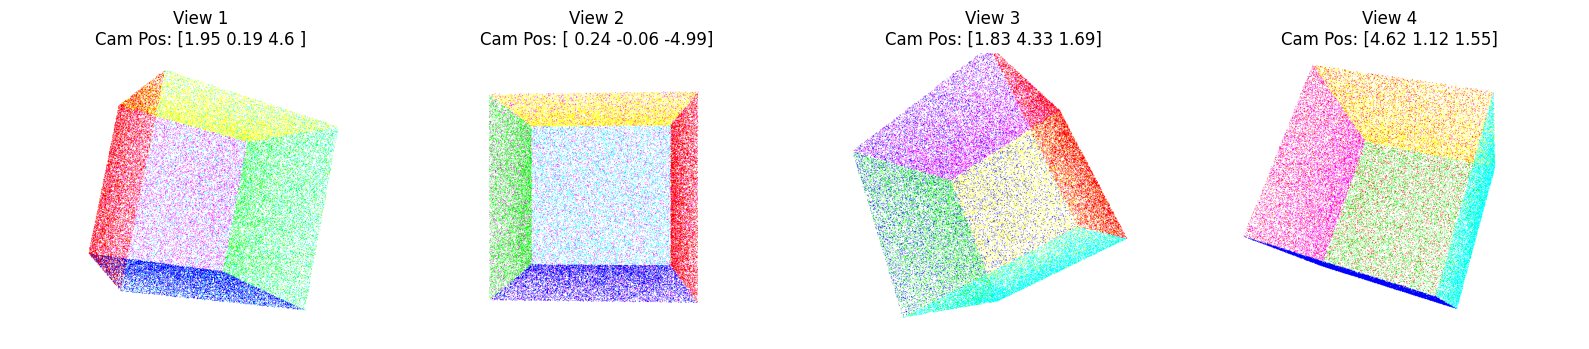

In [4]:
# Updated intrinsic matrix with a lower focal length (e.g., 300 instead of 800)
W, H = 640, 480
fl = 700
K = np.array([
    [fl,   0, W/2],
    [  0, fl, H/2],
    [  0,   0,   1]
])

# Generate a dataset with the updated intrinsic matrix
dataset_images = generate_image_dataset_with_depth(cube_faces, num_views=10, radius=5.0, K=K, H=H, W=W)

# Visualize a few sample images with the updated intrinsics
num_samples = 4
fig, axes = plt.subplots(1, num_samples, figsize=(4*num_samples, 4))
for i in range(num_samples):
    sample = dataset_images[i]
    img = sample['image'].transpose(1, 2, 0)
    axes[i].imshow(img)
    axes[i].set_title(f"View {i+1}\nCam Pos: {np.round(sample['camera_pos'],2)}")
    axes[i].axis('off')
    # print(sample['camera_pos'])
plt.tight_layout()
plt.show()

## Implementing a 3D Multivector Linear Layer and MLP

In a geometric algebra (Clifford) setting, each channel is represented as a full multivector with 8 components (in 3D). To process such data, we define a specialized linear layer—**MultivectorLinear**—that:
- Accepts an input tensor of shape $(B, C_{\text{in}}, 8)$.
- Uses a Clifford kernel (obtained via `cliffordkernels.get_3d_clifford_kernel`) to map the flattened input (of dimension $8 \times C_{\text{in}}$) to an output of dimension $8 \times C_{\text{out}}$.
- Reshapes the result back to $(B, C_{\text{out}}, 8)$.

Using this module, we then define a **MultivectorMLP** that consists of:
1. A MultivectorLinear layer.
2. A Clifford-based group normalization (e.g., `gn.CliffordGroupNorm3d`).
3. An activation function.
4. A second MultivectorLinear layer.
5. A final transposition to restore the output shape $(B, C_{\text{out}}, 8)$.

This design modularizes the “Clifford‐linear” transformation so that it can be reused inside deeper architectures.

In [5]:
! pip install cliffordlayers


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cliffordlayers.cliffordkernels as ck
import cliffordlayers.nn.modules.groupnorm as gn



def custom_clifford_norm(x, eps=1e-5):
    """
    Custom normalization for 3D multivector tensors.
    
    Args:
        x: A tensor of shape (B, C, 8) where each channel is a 3D multivector.
        eps: A small constant for numerical stability.
        
    Returns:
        x_normalized: The normalized tensor of the same shape as x.
    """
    # Compute mean of the scalar part (first blade) across the batch (dim 0)
    # Using x[..., 0:1] preserves the last dimension (shape becomes (1, C, 1))
    m = torch.mean(x[..., 0:1], dim=0, keepdims=True)
    
    # Shift the scalar component: subtract the computed mean
    x_shifted_0 = x[..., 0:1] - m  # shape (B, C, 1)
    
    # Concatenate the shifted scalar with the remaining blades (unchanged)
    x_shifted = torch.cat([x_shifted_0, x[..., 1:]], dim=-1)  # shape (B, C, 8)
    
    # Compute variance across the batch (dim 0) and blade dimension (dim -1)
    var = torch.mean(x_shifted**2, dim=[0, 2], keepdims=True)  # shape (1, C, 1)
    
    # Normalize: divide shifted tensor by the square root of (var + eps)
    x_normalized = x_shifted / torch.sqrt(var + eps)
    
    return x_normalized


class MultivectorLinear(nn.Module):
    """
    A linear layer for 3D multivectors.
    
    Input shape:  (B, C_in, 8)
    Output shape: (B, C_out, 8)
    
    Internally:
      1. Transposes the input to (B, 8, C_in) and flattens it to (B, 8 * C_in).
      2. Obtains a Clifford kernel from a trainable weight parameter self.W,
         via ck.get_3d_clifford_kernel(self.W, g), where self.W has shape (8, C_out, C_in).
         This produces a kernel of shape (8, 8, C_out, C_in) that is reshaped to (8 * C_out, 8 * C_in).
      3. Multiplies the flattened input by the transposed kernel to yield (B, 8 * C_out).
      4. Reshapes the result to (B, 8, C_out) and transposes to (B, C_out, 8).
    """
    def __init__(self, C_in, C_out, g=(1,1,1)):
        super().__init__()
        self.C_in = C_in
        self.C_out = C_out
        self.g = g
        # Trainable weight parameter for the linear layer.
        # Its shape is (8, C_out, C_in); ck.get_3d_clifford_kernel() will expand this.
        self.W = nn.Parameter(torch.randn(8, C_out, C_in))

    def forward(self, x):
        """
        x: (B, C_in, 8)
        Returns: (B, C_out, 8)
        """
        B = x.shape[0]
        # 1) Transpose to (B, 8, C_in)
        x = x.transpose(1, 2)  # now (B, 8, C_in)
        # Flatten x to (B, 8 * C_in)
        x_flat = x.reshape(B, -1)
        
        # 2) Obtain Clifford kernel
        # get_3d_clifford_kernel returns a kernel of shape (8, 8, C_out, C_in)
        _, kernel = ck.get_3d_clifford_kernel(self.W, g=self.g)
        # Permute to (8, C_out, 8, C_in) then reshape to (8 * C_out, 8 * C_in)
        # kernel = kernel.permute(0,2,1,3).reshape(8 * self.C_out, 8 * self.C_in)
        
        # 3) Multiply: map (B, 8*C_in) -> (B, 8*C_out)
        out_flat = x_flat @ kernel.T
        
        # 4) Reshape to (B, 8, C_out) and then transpose to (B, C_out, 8)
        out = out_flat.reshape(B, 8, self.C_out).transpose(1, 2)
        return out


class MultivectorMLP(nn.Module):
    """
    A Multivector MLP that regresses from an input of shape (B, C_in, 8)
    to an output of shape (B, C_out, 8) using Clifford-based linear layers,
    group normalization, and activation.
    """
    def __init__(self, C_in, C_out, g=torch.tensor([1,1,1])):
        super().__init__()
        self.linear1 = MultivectorLinear(C_in, C_out, g=g)
        # Apply Clifford group normalization on output channels (B, C_out, 8)
        # self.norm = gn.CliffordGroupNorm3d(g=g, num_groups=1, channels=C_out)
        self.norm = custom_clifford_norm
        self.activation = F.gelu
        # A second linear layer for additional transformation
        self.linear2 = MultivectorLinear(C_out, C_out, g=g)
        self.linear3 = MultivectorLinear(C_out, C_out, g=g)
    
    def forward(self, x):
        # x: (B, C_in, 8)
        x = self.linear1(x)          # => (B, C_out, 8)
        x = self.norm(x)             # Normalize in the Clifford domain
        x = self.activation(x)       # Apply activation
        x = self.linear2(x)          # => (B, C_out, 8)
        x = self.norm(x)             # Normalize in the Clifford domain
        x = self.activation(x)       # Apply activation
        x = self.linear3(x)          # => (B, C_out, 8)
        return x



In [7]:
B = 2       # Batch size
C_in = 4    # Input channels (each channel is a 3D multivector)
C_out = 6   # Output channels
x = torch.randn(B, C_in, 8)  # Random input tensor of shape (B, C_in, 8)

model = MultivectorMLP(C_in, C_out, g=torch.tensor([1,1,1]))
y = model(x)
print("Input shape:", x.shape)
print("Output shape:", y.shape)  # Expected: (B, C_out, 8)

Input shape: torch.Size([2, 4, 8])
Output shape: torch.Size([2, 6, 8])


Our goal is to build a neural network that processes a 2D image of a colored cube (from a synthetic dataset) and directly regresses the camera’s pose—that is, its rotation (expressed as a quaternion) and translation.

### Architecture Overview

1. **Input Image:**  
   - The network takes a 2D image of shape $(B, C, H, W)$ (for example, a grayscale or RGB image).

2. **Convert to Multivector Field:**  
   - To prepare the image for 2D Clifford processing, we expand its last dimension by appending two zero channels, yielding a tensor of shape $(B, C, H, W, 3)$.  
   - This “multivector field” has 3 components per spatial location, which is required by the 2D Clifford blocks.

3. **CliffordNet2d Processing:**  
   - The multivector field is fed into a CliffordNet2d (or a series of CliffordBasicBlock2d modules) to extract geometric features.  
   - The output from this stage has shape $(B, C_{\text{out}}, H, W, 3)$.

4. **Spatial Averaging:**  
   - A spatial average over the height and width dimensions reduces the tensor to $(B, C_{\text{out}}, 3)$.

5. **Expansion to 3D Multivectors:**  
   - Each channel is “lifted” to a full 3D multivector with 8 components.  
   - This conversion produces a tensor of shape $(B, C_{\text{out}}, 8)$.  
   - In our implementation, this is achieved by concatenating zeros to the 3-component feature vector.

6. **Multivector MLP:**  
   - The expanded tensor is then passed through a Multivector MLP, which regresses the final pose.  
   - The MLP maps the multivector features to an output tensor of shape $(B, 1, 8)$.  
   - (Typically, the number of output channels $C''$ is set to 1 for final regression.)

7. **Splitting and Normalization:**  
   - The final 8 components are split into two parts:
     - **Rotation Quaternion:** Indices $[0, 4, 5, 6]$ form the quaternion, which is then normalized to ensure it is a unit quaternion.
     - **Translation:** Indices $[1, 2, 3]$ form the translation vector.
   - The model returns these as separate tensors, with shapes $(B, 4)$ for the quaternion and $(B, 3)$ for the translation.

#### Summary

This end-to-end model leverages CliffordNet2d for feature extraction and a dedicated Multivector MLP for regression, providing a fully differentiable pipeline that directly estimates the camera pose from a single 2D image.

In [8]:
# Import the 2D Clifford network module (assumed to be available)
import cliffordlayers.models.models_2d as models_2d


class CameraPoseCliffordModel(nn.Module):
    """
    Camera Pose Regression using CliffordNet2d and a Multivector MLP.
    
    Input: A 2D image of shape (B, C, H, W)
    Output: A rotation quaternion (B, 4) and a translation vector (B, 3)
    
    Architecture Steps:
      1. Convert the image to a multivector field: (B, C, H, W) -> (B, C, H, W, 3)
      2. Process via CliffordNet2d to obtain (B, C_out, H, W, 3)
      3. Spatial average over (H, W) to get (B, C_out, 3)
      4. Convert to a full 3D multivector representation: (B, C_out, 3) -> (B, C_out, 8)
      5. Pass through a Multivector MLP to regress to (B, 1, 8)
      6. Split the 8 components into quaternion and translation.
    """
    def __init__(self, in_channels=1, hidden_channels=32, mlp_out_channels=1):
        super().__init__()
        # Instantiate CliffordNet2d from the library
        # Here, we use a typical configuration; adjust parameters as needed.
        self.clifford_net = models_2d.CliffordNet2d(
            g = [1, 1],
            block = models_2d.CliffordBasicBlock2d,
            num_blocks = [2, 2, 2, 2],
            in_channels = in_channels,
            out_channels = hidden_channels,
            hidden_channels = hidden_channels,
            activation = F.gelu,
            norm = True,
            rotation = False,
        )
        self.hidden_channels = hidden_channels
        
        
        
        # Instantiate the Multivector MLP to map from (B, hidden_channels, 8) to (B, mlp_out_channels, 8)
        self.mlp = MultivectorMLP(C_in=hidden_channels, C_out=mlp_out_channels)

    def expand_to_3d(self, x):
        out = torch.stack(
            [
                x[..., 0],
                x[..., 1],
                x[..., 2],
                torch.zeros_like(x[..., 0]),
                torch.zeros_like(x[..., 0]),
                torch.zeros_like(x[..., 0]),
                torch.zeros_like(x[..., 0]),
                torch.zeros_like(x[..., 0]),
            ], 
            dim = -1
        )

        return out


        
    def forward(self, x):
        """
        Args:
            x: Input image tensor of shape (B, C, H, W)
        
        Returns:
            q: Quaternion tensor of shape (B, 4)
            t: Translation tensor of shape (B, 3)
        """
        B, C, H, W = x.shape
        
        # 1. Convert image to multivector field: (B, C, H, W) -> (B, C, H, W, 3)
        # Assume original image channels are scalar; we append two zeros.
        x = x.unsqueeze(-1)  # (B, C, H, W, 1)
        zeros = torch.zeros_like(x)  # (B, C, H, W, 1)
        x = torch.cat([x, zeros, zeros], dim=-1)  # (B, C, H, W, 3)
        # 2. Pass through CliffordNet2d.
        x = self.clifford_net(x)      # Expected output: (B, hidden_channels, 3, H, W)
        # 3. Spatial average over (H, W) => (B, hidden_channels, 3)
        x = x.mean(dim=[2, 3])

        
        
        # 4. Expand features from 3 to 8 components per channel: (B, hidden_channels, 3) -> (B, hidden_channels, 8)
        x = self.expand_to_3d(x)  # Linear transformation applied to last dimension


        
        
        # 5. Pass through the Multivector MLP => (B, mlp_out_channels, 8)
        x = self.mlp(x)

        
        # 6. At this point, we expect x to have shape (B, 1, 8).
        # Split the 8 components: indices [0, 4, 5, 6] for quaternion, [1, 2, 3] for translation.
        q = x[..., [0, 4, 5, 6]]  # shape: (B, 1, 4)
        t = x[..., [1, 2, 3]]      # shape: (B, 1, 3)
        
        # Normalize the quaternion to ensure it is a unit quaternion.
        q = q / torch.norm(q, dim=-1, keepdim=True)
        
        # Squeeze the channel dimension: final shapes (B, 4) and (B, 3)
        q = q.squeeze(1)
        t = t.squeeze(1)
        
        return q, t

In [9]:
# Create a random grayscale image (B, C, H, W)
B, C, H, W = 2, 1, 64, 64
x = torch.randn(B, C, H, W)

model = CameraPoseCliffordModel(in_channels=C, hidden_channels=32, mlp_out_channels=1)
q, t = model(x)

print("Input image shape:", x.shape)
print("Predicted Quaternion shape:", q.shape)  # Expected: (B, 4)
print("Predicted Translation shape:", t.shape)  # Expected: (B, 3)
print("Sample Quaternion:\n", q[0])
print("Sample Translation:\n", t[0])

Input image shape: torch.Size([2, 1, 64, 64])
Predicted Quaternion shape: torch.Size([2, 4])
Predicted Translation shape: torch.Size([2, 3])
Sample Quaternion:
 tensor([ 0.7803, -0.2478,  0.5217, -0.2399], grad_fn=<SelectBackward0>)
Sample Translation:
 tensor([-1.1871, -0.3706,  0.4747], grad_fn=<SelectBackward0>)


## End-to-End Pose Regression Pipeline and Comparison

In this final step, we combine all the snippets and methodology presented above into a complete **pose regression pipeline**. Specifically:

1. **Dataset Generation & Splitting:**
   - We generate or load approximately 1000 synthetic cube‐view images, each labeled with a ground‐truth camera pose (rotation quaternion + translation).
   - The dataset is then split into training (70%), validation (15%), and test (15%) sets.

2. **Two Models:**
   1. **CameraPoseCliffordModel** (GA‐Based):  
      - Takes a 2D image, converts it into a Clifford multivector field, processes it via CliffordNet2d, performs spatial averaging, lifts features to full 3D multivectors, and regresses the final pose with a Multivector MLP.
   2. **ResNet‐Based Model** (No GA):  
      - A CNN (e.g., ResNet style) that outputs 7 features. The first 4 features form the rotation quaternion (after normalization), and the remaining 3 represent translation.

3. **Training Loop & Early Stopping:**
   - We train both models on the training set using MSE loss, monitor validation loss for early stopping, and finally evaluate on the test set.

4. **Comparison:**
   - The test set MSE (or any chosen metric) for both models is reported, providing a direct comparison between the Clifford GA approach and a standard CNN baseline.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.models as models


class CubePoseDataset(Dataset):
    def __init__(self, data_list):
        self.data_list = data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        return self.data_list[idx]
    

class ResNetPoseModel(nn.Module):
    """
    A pose regression model using a torchvision ResNet backbone.
    Outputs 7 features:
      - First 4 => rotation quaternion (normalized)
      - Last 3 => translation
    """
    def __init__(self, out_features=7, pretrained=False):
        super().__init__()
        # Load a ResNet-18 (you can choose resnet50, etc.) from torchvision
        # weights=None if pretrained=False, or you can set pretrained weights
        self.resnet = models.resnet18(weights=None if not pretrained else 'IMAGENET1K_V1')
        
        # Modify the final fully-connected layer to produce 'out_features' (7)
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, out_features)

    def forward(self, x):
        """
        Args:
            x: Input image of shape (B, C, H, W).
        Returns:
            q: Quaternion of shape (B, 4), normalized
            t: Translation of shape (B, 3)
        """
        # Forward pass through ResNet => (B, 7)
        out = self.resnet(x)
        
        # Split the first 4 features for quaternion, last 3 for translation
        q = out[:, :4]   # (B,4)
        t = out[:, 4:]   # (B,3)
        
        # Normalize the quaternion
        q_norm = q / torch.norm(q, dim=1, keepdim=True)
        
        return q_norm, t



def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for batch in loader:
        images = batch['image']
        cam_pos = batch['camera_pos'].float()
        q = batch['quaternion'].float()
        images, cam_pos, q = images.to(device), cam_pos.to(device), q.to(device)
        optimizer.zero_grad()
        pred_q, pred_t = model(images)
        loss = criterion(pred_q, q) + criterion(pred_t, cam_pos)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)
        print("Loss:", loss.item())
    return total_loss / len(loader.dataset)

@torch.no_grad()
def eval_epoch(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    for batch in loader:
        images = batch['image']
        cam_pos = batch['camera_pos']
        q = batch['quaternion']
        images, cam_pos, q = images.to(device), cam_pos.to(device), q.to(device)
        pred_q, pred_t = model(images)
        loss = criterion(pred_q, q) + criterion(pred_t, cam_pos)
        total_loss += loss.item() * images.size(0)
    return total_loss / len(loader.dataset)

class EarlyStopper:
    def __init__(self, patience=5):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0
        self.stop = False

    def step(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.stop = True



In [ ]:
# 1) Generate the dataset with your custom function:
W, H = 64, 48
fl = 70
K = np.array([
    [fl,   0, W/2],
    [  0, fl, H/2],
    [  0,   0,   1]
])

# Generate a dataset with the updated intrinsic matrix
data_list = generate_image_dataset_with_depth(cube_faces, num_views=1000, radius=5.0, K=K, H=H, W=W)
full_dataset = CubePoseDataset(data_list)



In [ ]:
# 2) Split dataset: train (70%), val (15%), test (15%)
total = len(full_dataset)
train_size = int(0.7 * total)
val_size = int(0.15 * total)
test_size = total - train_size - val_size
train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()



In [ ]:
# 3) Train CameraPoseCliffordModel
model_clifford = CameraPoseCliffordModel(in_channels=3, hidden_channels=8, mlp_out_channels=1).to(device)
opt_clifford = optim.Adam(model_clifford.parameters(), lr=1e-3)
stopper_clifford = EarlyStopper(patience=5)
num_epochs = 50

for epoch in range(num_epochs):
    train_loss = train_epoch(model_clifford, train_loader, opt_clifford, criterion, device)
    val_loss = eval_epoch(model_clifford, val_loader, criterion, device)
    print(f"[Clifford] Epoch {epoch+1}/{num_epochs} | Train: {train_loss:.4f}, Val: {val_loss:.4f}")
    stopper_clifford.step(val_loss)
    if stopper_clifford.stop:
        print("Early stopping triggered for Clifford model.")
        break

test_loss_clifford = eval_epoch(model_clifford, test_loader, criterion, device)
print("CameraPoseCliffordModel Test Loss:", test_loss_clifford)



Loss: 9.950615882873535
Loss: 8.422331809997559
Loss: 8.225784301757812
Loss: 7.461106777191162
Loss: 6.401052474975586
Loss: 6.308980941772461
Loss: 6.51198148727417
Loss: 6.545618057250977
Loss: 6.104350566864014
Loss: 6.410499095916748
Loss: 5.075509548187256
Loss: 5.466149806976318
Loss: 5.76387357711792
Loss: 5.304751396179199
Loss: 5.537684440612793
Loss: 4.823765277862549
Loss: 5.694800853729248
Loss: 5.278446197509766
Loss: 5.303542613983154
Loss: 4.786159038543701
Loss: 4.5599589347839355
Loss: 5.40718412399292
[Clifford] Epoch 1/50 | Train: 6.1563, Val: 4.7031


In [ ]:
# 4) Train ResNet-based model
model_resnet = ResNetPoseModel(in_channels=1, num_features=7).to(device)
opt_resnet = optim.Adam(model_resnet.parameters(), lr=1e-3)
stopper_resnet = EarlyStopper(patience=5)

for epoch in range(num_epochs):
    train_loss = train_epoch(model_resnet, train_loader, opt_resnet, criterion, device)
    val_loss = eval_epoch(model_resnet, val_loader, criterion, device)
    print(f"[ResNet] Epoch {epoch+1}/{num_epochs} | Train: {train_loss:.4f}, Val: {val_loss:.4f}")
    stopper_resnet.step(val_loss)
    if stopper_resnet.stop:
        print("Early stopping triggered for ResNet baseline.")
        break

test_loss_resnet = eval_epoch(model_resnet, test_loader, criterion, device)
print("ResNetPoseModel Test Loss:", test_loss_resnet)



In [ ]:
# 5) Compare final performance
print("\nPerformance Comparison:")
print(f"CameraPoseCliffordModel: {test_loss_clifford:.4f}")
print(f"ResNetPoseModel       : {test_loss_resnet:.4f}")